In [3]:
import cv2
import matplotlib.pyplot as plt
from face_training import names

Arquivo timothée_chalamet/imagem_1.jpeg baixado para ./images/User.1.10.jpg
Arquivo timothée_chalamet/imagem_10.jpeg baixado para ./images/User.1.11.jpg
Arquivo timothée_chalamet/imagem_100.jpeg baixado para ./images/User.1.12.jpg
Arquivo timothée_chalamet/imagem_11.jpeg baixado para ./images/User.1.13.jpg
Arquivo timothée_chalamet/imagem_12.jpeg baixado para ./images/User.1.14.jpg
Arquivo timothée_chalamet/imagem_13.jpeg baixado para ./images/User.1.15.jpg
Arquivo timothée_chalamet/imagem_14.jpeg baixado para ./images/User.1.16.jpg
Arquivo timothée_chalamet/imagem_15.jpeg baixado para ./images/User.1.17.jpg
Arquivo timothée_chalamet/imagem_16.jpeg baixado para ./images/User.1.18.jpg
Arquivo timothée_chalamet/imagem_17.jpeg baixado para ./images/User.1.19.jpg
Arquivo timothée_chalamet/imagem_18.jpeg baixado para ./images/User.1.20.jpg
Arquivo timothée_chalamet/imagem_19.jpeg baixado para ./images/User.1.21.jpg
Arquivo timothée_chalamet/imagem_2.jpeg baixado para ./images/User.1.22.jpg


In [4]:
def showImage(image, title, axis=True, cmapImage=None):
    plt.imshow(image, cmap=cmapImage)
    plt.axis('on' if axis else 'off')
    plt.title(title)
    plt.show()

In [10]:
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainer.yml')  # Carregar modelo treinado
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + cascadePath)

font = cv2.FONT_HERSHEY_SIMPLEX

# Definir nomes correspondentes aos IDs
#names = ['', 'Robert Downey Junior', 'Test 2', 'Test 3']  # Índice 0 está vazio para coincidir com os IDs

image_path = './test_image.png'
img = cv2.imread(image_path)
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(
    imgGray,
    scaleFactor=2.4,
    minNeighbors=5,
    minSize=(30, 30)
)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    id, confidence = recognizer.predict(imgGray[y:y+h, x:x+w])

    # Checar confiança
    if confidence < 100:
        id = names[id]
        confidence = "  {0}%".format(round(100 - confidence))
    else:
        id = "Desconhecido"
        confidence = "  {0}%".format(round(100 - confidence))

    cv2.putText(img, str(id), (x + 5, y - 5), font, 1, (255, 255, 255), 2)
    cv2.putText(img, str(confidence), (x + 5, y + h - 5), font, 1, (255, 255, 0), 1)


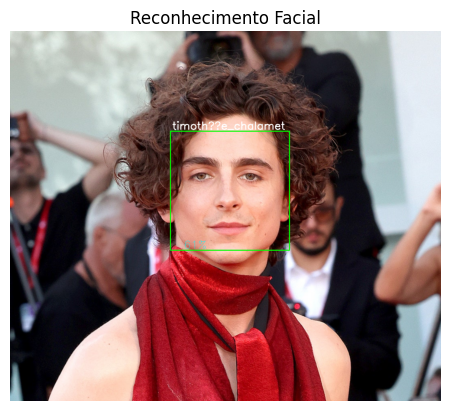

In [11]:
imgRgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
showImage(imgRgb, 'Reconhecimento Facial', False)